Az unbalanced training data nem jó ha egy klasszifikáló hálót akarunk betanítani, mert az alulreprezentált osztályokra nem fog kellően rátanulni.
A mi esetünkben ez a karakterfelismerő lépésnél jelenthet majd gondot. Megnézem milyen is a tanító halmazunk ebből a szempontból.

A terv, hogy megnézem milyen pozíciókban mennyiszer fordulnak elő bizonyos betűk és számok. Ehhez először létrehozok egy DataFrame-t, amiben az oszlopok a betűket/számokat tartalmazzák sorrendben.

In [22]:
import pandas as pd

csv_file = 'KF_HF_train_dataset.csv'

df = pd.DataFrame({'L1' : [], 'L2': [], 'L3': [], 'N1' : [], 'N2': [], 'N3': []})
lp = pd.DataFrame()

with open(csv_file, 'r') as file:
    lp = pd.read_csv(file, index_col=0)
lp = lp.iloc[:, 0]

mask = lp.str[3] == '-' # a régi típusú, szokványos rendszámokat nézzük, mert abból van a legtöbb
df = df._append(pd.DataFrame({'L1': lp[mask].str[0:1].values,
                                'L2': lp[mask].str[1:2].values,
                                'L3': lp[mask].str[2:3].values,
                                'N1' : lp[mask].str[4:5].values,
                                'N2': lp[mask].str[5:6].values,
                                'N3': lp[mask].str[6:7].values}), ignore_index=True)


print(df.head())

  L1 L2 L3 N1 N2 N3
0  A  E  S  1  6  0
1  A  E  C  7  1  6
2  G  K  A  5  5  0
3  D  K  G  9  7  0
4  M  L  F  3  0  6


Ezután aggregáljuk és megjelenítjük

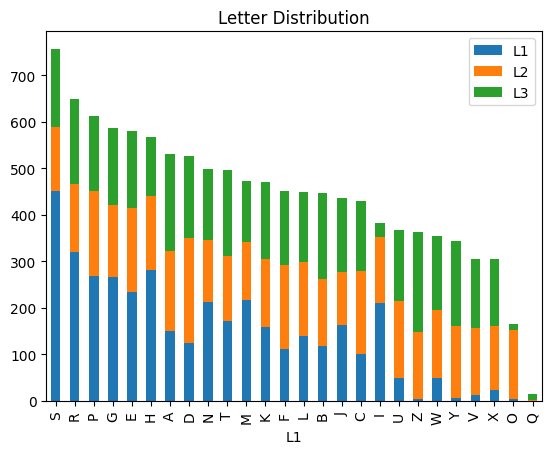

In [23]:
import matplotlib.pyplot as plt

aggregate_df = pd.DataFrame()
aggregate_df['L1'] = df['L1'].value_counts()
aggregate_df['L2'] = df['L2'].value_counts()
aggregate_df['L3'] = df['L3'].value_counts()

aggregate_df["Total"] = aggregate_df[['L1', 'L2', 'L3']].sum(axis=1)
aggregate_df_sorted = aggregate_df.sort_values(by="Total", ascending=False)
aggregate_df_sorted.plot(kind='bar', y=['L1','L2','L3'], stacked=True)
plt.title('Letter Distribution')
plt.show()

Láthatóak különböző anomálik, egyensúlytalanságok, pl:
- sok S betű
- O és Q nagyon kevés van
  
Pozíció függő anomáliák:
- I betű ritkán a harmadik betű
- O kb csak 2. betű
- U V W X Y Z ritkán első betű
  
Ezekkel majd később lehet foglalkoznunk kell

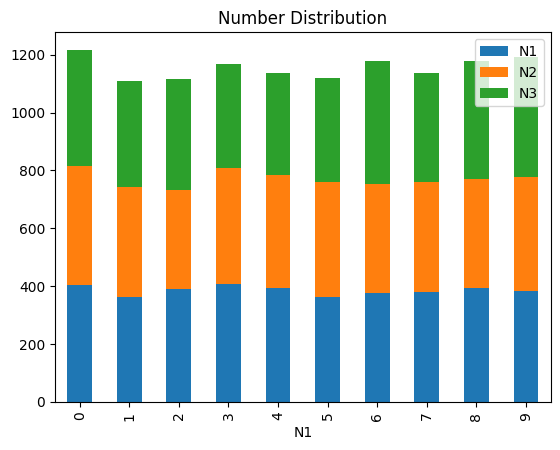

In [25]:
aggregate_df = pd.DataFrame()
aggregate_df['N1'] = df['N1'].value_counts()
aggregate_df['N2'] = df['N2'].value_counts()
aggregate_df['N3'] = df['N3'].value_counts()
aggregate_df = aggregate_df.sort_index(ascending=True)
aggregate_df.plot(kind='bar', y=['N1','N2','N3'], stacked=True)
plt.title('Number Distribution')
plt.show()


Számoknál nincs baj sehol